In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup


In [3]:
sd

NameError: name 'sd' is not defined

In [2]:
def cut_str(text, max_len=0):
    try:
        if len(text) <= max_len:
            return text
        elif max_len == 0:
            print('You forgot to adjust a max_len parameter')
        elif max_len < 0:
            print('Could you please choose a positive number for max_len parameter')
        else:
            return text[:max_len] + '...'
    except TypeError:
        print('It should be a string')

test = 'Faggit sittin\' in Turkey'

cut_str(test, max_len=1)

'F...'

In [ ]:
import Levenshtein


In [ ]:
a,b = 'RUB' , 'RUB.'
c,d = 'RUBB' , 'RUB&'
Levenshtein.distance(a,c)

1

In [ ]:
from nltk.metrics import edit_distance
edit_distance(a,c)

1

Напишите функцию apply_discounts(products, stocks), которая снижает цену продуктов в словаре products на указанный в словаре stocks процент. Функция должна вернуть результирующий словарь, ключи которого — товары, а значения — новые цены. Если продукта из словаря products нет в словаре stocks, то скидка к нему не применяется. Цены округлите до второго знака после запятой.

In [ ]:
products = {'apple':6, 'orange':4, 'banana':6, 'cherry':10}
stocks = {'apple':'25%', 'orange':'50%', 'banana':'75%'}


def apply_discounts(products, stocks):
    for key in stocks.keys():
        stocks[key] = stocks[key].replace('%','')
        stocks[key] = int(stocks[key])
        
    
    
    for key in products.keys():
        if key in stocks.keys():
            products[key] = round(products[key] - (products[key] * (stocks[key]/100)),2)
    return products




apply_discounts(products, stocks)

{'apple': 4.5, 'orange': 2.0, 'banana': 1.5, 'cherry': 10}

Вам даны два файла bronze_top.csv и silver_top.csv, в которых хранится информация о ТОП-5 стран по числу бронзовых и серебряных медалей соответственно. В каждой таблице два одинаковых столбца: Country — страна и Total — число медалей.

Объедините две таблицы по странам таким образом, чтобы в результат вошли данные только о тех странах, которые попали в оба рейтинга. При этом в качестве суффиксов укажите строки "_bronze" и "_silver", чтобы столбцы таблиц, не участвовавших в объединении, можно было различать.

Результат занесите в переменную merged.

In [ ]:
import pandas as pd

bronze_top = pd.DataFrame({'country':['USA','China','Canada'], 'total':[5,6,8]})
silver_top = pd.DataFrame({'country':['USA','China'], 'total':[7,5]})

merged = bronze_top.merge(
    silver_top,
    on=['country'],
    how='inner',
    suffixes=['_bronze','_silver']
)
merged

,country,total_bronze,total_silver
0,USA,5,7
1,China,6,5


In [ ]:
solar_data = pd.read_csv('data/solarpower.csv')
solar_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [ ]:
empty_ = solar_data[solar_data['cum_power']==-1].index.values.astype('int')
for i in empty_:
    solar_data['cum_power'][i] = (solar_data['cum_power'][i-1] + solar_data['cum_power'][i+1])/2


C:\Users\nayor\AppData\Local\Temp\ipykernel_8720\3123856461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_data['cum_power'][i] = (solar_data['cum_power'][i-1] + solar_data['cum_power'][i+1])/2


In [ ]:
solar_data['cum_power'].mean()

23848.246987951807

Теперь, когда таблица заполнена, создайте столбец day_power — ежедневная выработка солнечной энергии.

Далее создайте данные о средней ежедневной выработке энергии на каждый месяц-год.

Совет: для того чтобы выделить из даты год и месяц, проще всего будет воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды (в данном случае 'М' — месяц).

Затем сгруппируйте данные по периодам (год-месяц) и рассчитайте среднее в столбце day_power.

Сколько солнечной энергии в среднем в день выработали в марте 2017 года? Ответ округлите до целого.

In [ ]:
solar_data['day_power'] = solar_data['cum_power'].diff()

In [ ]:
solar_data['date'] = pd.to_datetime(solar_data['date'])

In [ ]:
solar_data['month'] = solar_data['date'].dt.to_period('M')

In [ ]:
solar_data.groupby(by='month')['day_power'].mean()

In [ ]:
graph = solar_data.groupby(by='month')['day_power'].mean()

<AxesSubplot: xlabel='month'>

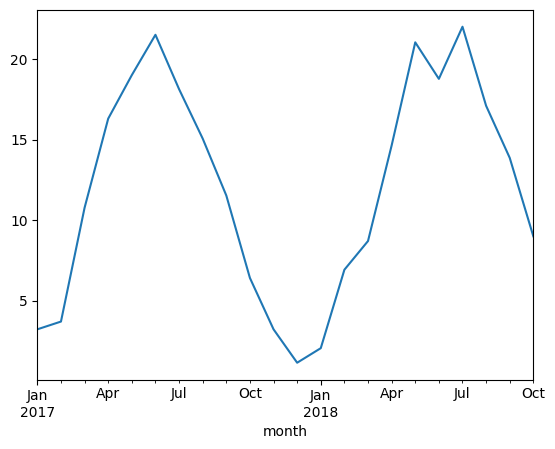

In [ ]:
graph.plot()

In [ ]:
# Введите свое решение ниже
import os
import pandas as pd

bronze_path = os.path.abspath('bronze_top.csv')
silve_path = os.path.abspath('silver_top.csv')


bronze_top = pd.read_csv(bronze_path)
silver_top = pd.read_csv(silve_path)

merged = bronze_top.merge(
    silver_top,
    on=['Country'],
    how='inner',
    suffixes=['_bronze','_silver']
)

-1110